# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
# **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
# **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.matrix import gridspec

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for preprocessing and building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import libraries for model evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from seaborn.matrix import gridspec
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import statsmodels.stats.api as sms
from scipy import stats
import pylab
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading the dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MIT--Data Science Course/Elective Project/Boston.csv')
df = data.copy()

# **Data Overview**

In [ ]:
# Checking the shape of the data
df.shape

(506, 13)

**Observation:**

* There are 506 rows and 13 columns of data.

In [ ]:
# Checking the first and last rows of data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


**Observation:**

* The data is all numerical, made up of proportional, possibly categorical, and continuous.
* We have 12 independent variables and MEDV is the dependent variable.

In [ ]:
# Checking the data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observation:**

* All 506 rows show no missing values.
* Most values are floats, numerical.
* CHAS and possibly RAD appears to be a cateforical column.

In [ ]:
# Changing the categorical variable to object
df['CHAS'] = df['CHAS'].astype('object')

In [ ]:
# Checking for null and duplicate data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Observation:**

* There are no missing values or duplicate values in the data.

In [ ]:
# Checking the unique values for each column
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

In [ ]:
# Checking the RAD column if it's categorical
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [ ]:
# Checking the CHAS column for categorical information
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

**Observation:**

* The RAD column should be considered numerical at this time, in the future if we wanted to categorize the accessiblities into fewer groups we could do that.
* CHAS is a binary categorical column.

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Checking statistical summary of the data
df.describe(include='all').round(3).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CRIM,506.0,NaN,NaN,NaN,3.614,8.602,0.006,0.082,0.257,3.677,88.976
ZN,506.0,NaN,NaN,NaN,11.364,23.322,0.000,0.000,0.000,12.500,100.000
INDUS,506.0,NaN,NaN,NaN,11.137,6.860,0.460,5.190,9.690,18.100,27.740
CHAS,506.0,2.0,0.0,471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,506.0,NaN,NaN,NaN,0.555,0.116,0.385,0.449,0.538,0.624,0.871
RM,506.0,NaN,NaN,NaN,6.285,0.703,3.561,5.885,6.208,6.624,8.780
AGE,506.0,NaN,NaN,NaN,68.575,28.149,2.900,45.025,77.500,94.075,100.000
DIS,506.0,NaN,NaN,NaN,3.795,2.106,1.130,2.100,3.207,5.188,12.126
RAD,506.0,NaN,NaN,NaN,9.549,8.707,1.000,4.000,5.000,24.000,24.000
TAX,506.0,NaN,NaN,NaN,408.237,168.537,187.000,279.000,330.000,666.000,711.000


**Observation:**

* The CRIM rate has a consider max for it's mean, will need to check if that's possibly an outlier.
* ZN will likely be a good indicator of proximity to urban areas in additon to the DIS.
* Vast majority aren't located next to the river, which was already apparent.
* RM must be the total rooms in the house, not bedrooms alone.
* The majority owner-occupied dwellings were built before 1940 in the SMSA area.
* TAX could be a great indicator of affluent areas.
* The MEDV values range from 5000 dollars to 50,000 dollars.

**Charles River tracting suburb or town Exploratory Analysis:**

In [ ]:
# Checking the percentages of CHAS
df['CHAS'].value_counts(1)

0    0.93083
1    0.06917
Name: CHAS, dtype: float64

In [ ]:
# Checking the number of suburbs or towns located on the Charles River
waterfront = df[df['CHAS'] == 1]
waterfront.shape[0]

35

In [ ]:
# Checking the the number of areas that are located on the Charles River and are high industrial areas
indus_waterfront = df[(df['CHAS'] == 1) & (df['INDUS'] > 15)]
print(indus_waterfront.shape)
indus_waterfront

(15, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3
154,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6
160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,1.92,50.0
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,17.60,17.8
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,13.27,21.7
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,11.48,22.7


In [ ]:
# Checking the percentage of high industrial area on the Charles River
percentage_of_dataset = (len(indus_waterfront) / len(waterfront)) * 100
print(f"The subset represents {percentage_of_dataset:.2f}% of the suburbs on the river.")

The subset represents 42.86% of the suburbs on the river.


In [ ]:
# Checking Charles River tracting, high industrial, high accessibility suburb or towns
indus_waterfront_high_rad = indus_waterfront[indus_waterfront['RAD'] == 24]
indus_waterfront_high_rad

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
356,8.98296,0.0,18.1,1,0.770,6.212,97.4,2.1222,24,666,20.2,17.60,17.8
357,3.84970,0.0,18.1,1,0.770,6.395,91.0,2.5052,24,666,20.2,13.27,21.7
358,5.20177,0.0,18.1,1,0.770,6.127,83.4,2.7227,24,666,20.2,11.48,22.7
363,4.22239,0.0,18.1,1,0.770,5.803,89.0,1.9047,24,666,20.2,14.64,16.8
364,3.47428,0.0,18.1,1,0.718,8.780,82.9,1.9047,24,666,20.2,5.29,21.9
369,5.66998,0.0,18.1,1,0.631,6.683,96.8,1.3567,24,666,20.2,3.73,50.0
370,6.53876,0.0,18.1,1,0.631,7.016,97.5,1.2024,24,666,20.2,2.96,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666,20.2,8.88,50.0


In [ ]:
# Checking the Charles River tracting, high Nitric Oxide, high accessibility suburbs or towns
nox_waterfront_high_rad = df[(df['CHAS'] == 1) & (df['NOX'] > .624) & (df['RAD'] == 24)]
nox_waterfront_high_rad

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
356,8.98296,0.0,18.1,1,0.770,6.212,97.4,2.1222,24,666,20.2,17.60,17.8
357,3.84970,0.0,18.1,1,0.770,6.395,91.0,2.5052,24,666,20.2,13.27,21.7
358,5.20177,0.0,18.1,1,0.770,6.127,83.4,2.7227,24,666,20.2,11.48,22.7
363,4.22239,0.0,18.1,1,0.770,5.803,89.0,1.9047,24,666,20.2,14.64,16.8
364,3.47428,0.0,18.1,1,0.718,8.780,82.9,1.9047,24,666,20.2,5.29,21.9
369,5.66998,0.0,18.1,1,0.631,6.683,96.8,1.3567,24,666,20.2,3.73,50.0
370,6.53876,0.0,18.1,1,0.631,7.016,97.5,1.2024,24,666,20.2,2.96,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666,20.2,8.88,50.0


In [ ]:
# Checking if NOX and INDUS river tracting, high accessibility are the same data set.
nox_indus_rad_waterfront = indus_waterfront_high_rad.equals(nox_waterfront_high_rad)
print(nox_indus_rad_waterfront)

True


In [ ]:
# Checking the percentage of high Nitric Oxide and high accessibility on the Charles River
percentage_of_dataset = (len(nox_waterfront_high_rad) / len(waterfront)) * 100
print(f"The subset represents {percentage_of_dataset:.2f}% of the suburbs on the river.")

The subset represents 22.86% of the suburbs on the river.


In [ ]:
# Checking ther percentage of high Nitric Oxide, waterfront areas in the greater Boston area
percentage_of_dataset = (len(nox_waterfront_high_rad) / len(df)) * 100
print(f"The subset represents {percentage_of_dataset:.2f}% of the entire dataset.")

The subset represents 1.58% of the entire dataset.


**Observation:**

* Additional Charles River tracting suburb information:
  * Only 7% of the suburbs or towns are located on the Charles River.
  * Of the suburbs or towns located on the river 42% are high industrial areas and 22% are high industrial and have high accessibility to the radial highways.
    * The river tracting, industrial areas, with high accessibility to the radial highways, are the same 8 suburbs or towns as the river tracting,  high Nitric Oxide, high accessibility to radial highways.
      * This subset makes up 1.58% of the entire Boston area suburbs.

## **Univariate Analysis**  **(QUESTION #3)**

In [ ]:
# Defining barplot function
def labeled_barplot(data, feature, perc = False, n = None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",)
    plt.show()

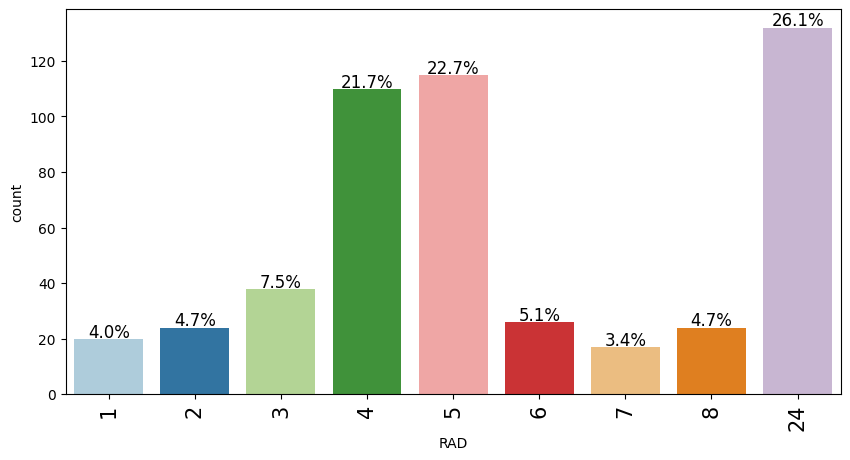

In [ ]:
labeled_barplot(df, 'RAD', perc = True)

**Observation:**

* The higher the number the more accessibile the suburb or town is to the radial highways, 24 being very accessible, it is also the largest single index at 26%.
* Then 4 and 5 together make up 44% of the remaining index values, the data could also be viewed as the majority of suburd or towns have a low accessibility (1-8) to the radial highways.

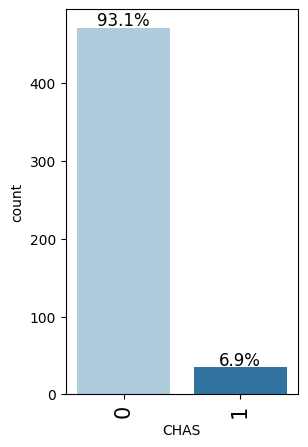

In [ ]:
labeled_barplot(df, 'CHAS', perc = True)

**Observation:**

* As shown in the data overview, over 93% of the suburbs or towns are not adjacant to the Charles River.

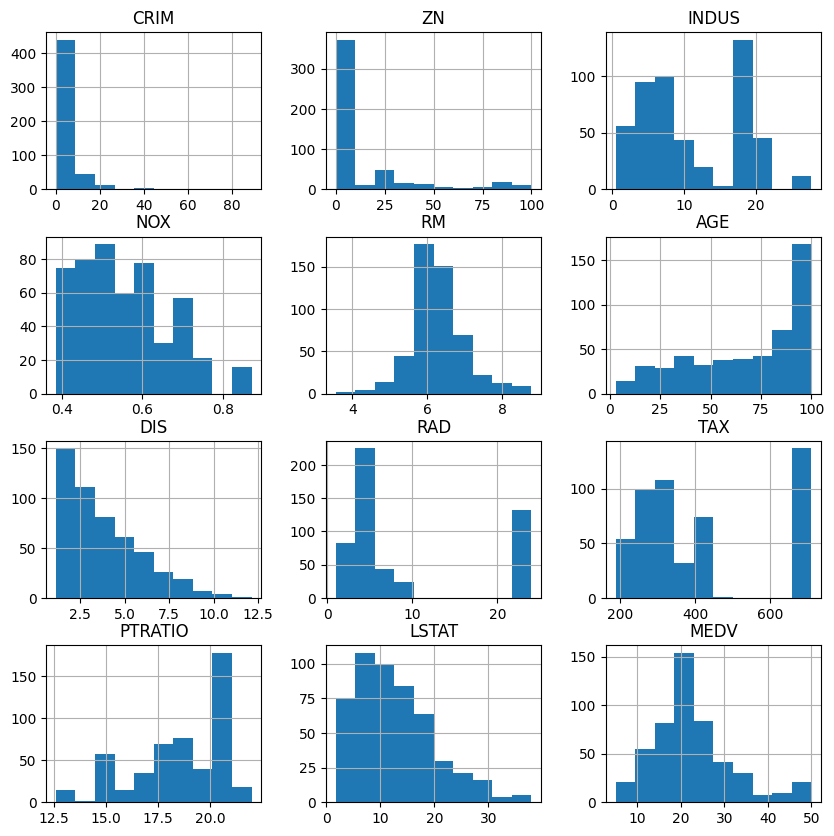

In [ ]:
# Overview of the data in histograms
num_cols = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
df[num_cols].hist(figsize = (10, 10))

plt.show()

**Observation:**

* A quick thumbnail to see was the distribution of all the numerical data looks like.  
    * Most of the variable have some level of skew, possible outliers, and possibly some correlations that will show up after further analysis.

In [ ]:
# Defining boxplot histogram funciton
def histogram_boxplot(data, feature, figsize = (8, 4), kde = False, bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex = True,
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,)

    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )
    sns.histplot(
        data = data, x = feature, kde = True, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = True, ax = ax_hist2
    )
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = "black", linestyle = "-")

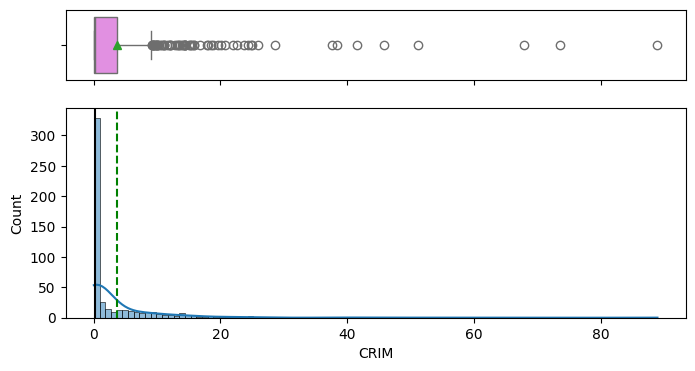

In [ ]:
histogram_boxplot(df, 'CRIM', kde = True)

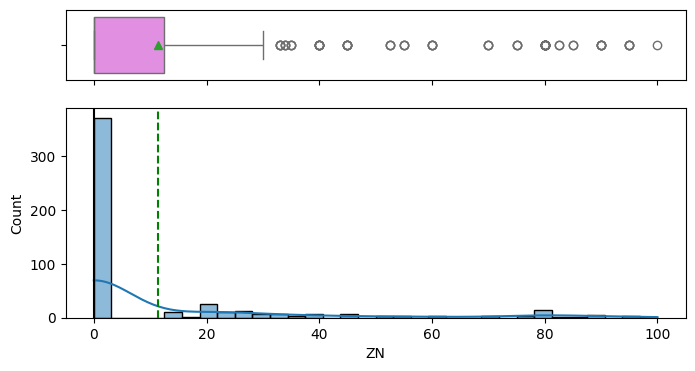

In [ ]:
histogram_boxplot(df, 'ZN', kde = True)

**Observation:**

* CRIM and ZN are severely right skewed.  
    * CRIM could possibly have a couple outliers, an 88% crime rate seems illogical, especially when the 3rd quartile range is just 3.6%
    * ZN while there is a definetly a sever right skew, saying there are 100% of the properties in a given town or suburd greater than a half acre is not illogical, especially in the more rural areas where perhaps 1 acre would be more of a normal minimun for a lot.

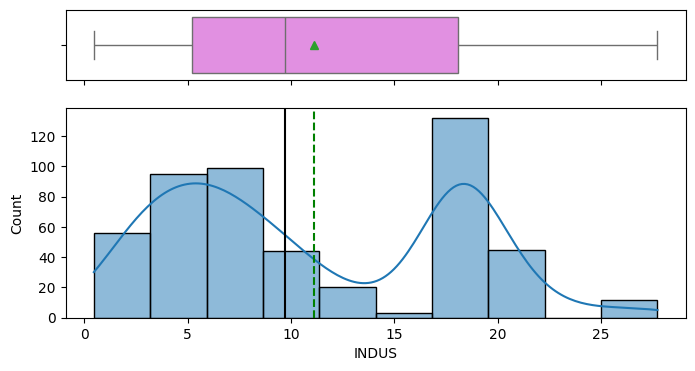

In [ ]:
histogram_boxplot(df, 'INDUS', kde = True)

**Observaton:**

* INDUS might have a bimodal distribution, perhaps you are seeing the two types of suburbs or towns here, a low industrial proportion in the heavy residental areas and then heavy industrial area in the areas with low residental.

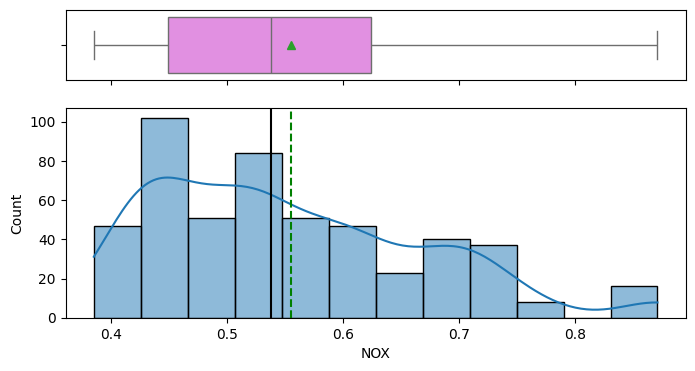

In [ ]:
histogram_boxplot(df, 'NOX', kde = True)

**Observation:**

* Slight right skew for the NOX, which could just indicate low NOX concentrations in less industrial areas, which are lower in number in general.

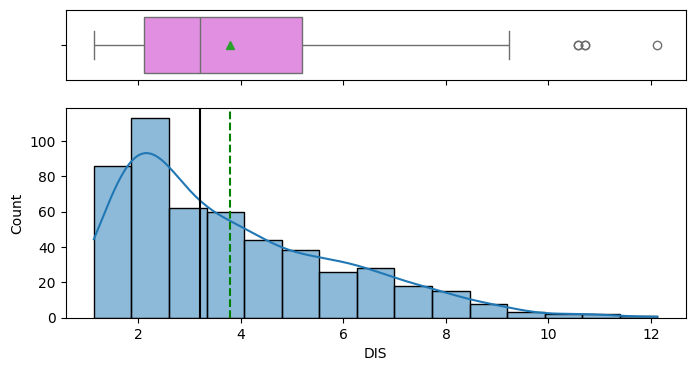

In [ ]:
histogram_boxplot(df, 'DIS', kde = True)

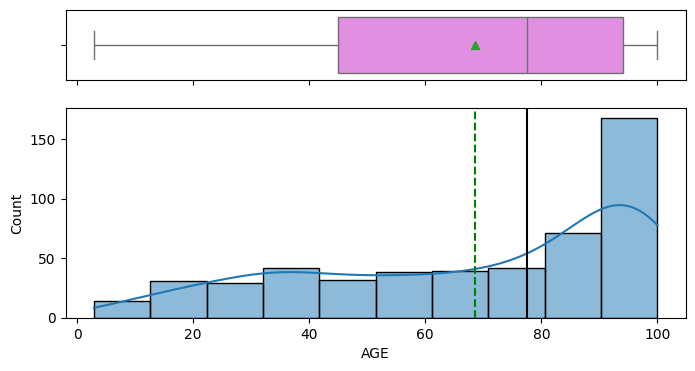

In [ ]:
histogram_boxplot(df, 'AGE', kde = True)

**Observation:**

* DIS falls within reasonable expectations.
* AGE shows the general age of the area, Boston has above 80% of owner-occupied homes being built before 1940, indicating it's has some historical relevance.

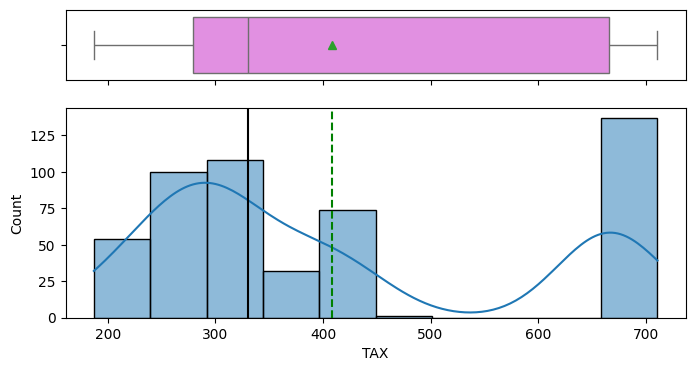

In [ ]:
histogram_boxplot(df, 'TAX', kde = True)

**Observation:**

* The TAX distribution might be indication a bimodal distribution as well, there could be a rural/areas where property values are affected by high industriral areas versus more affluent areas.

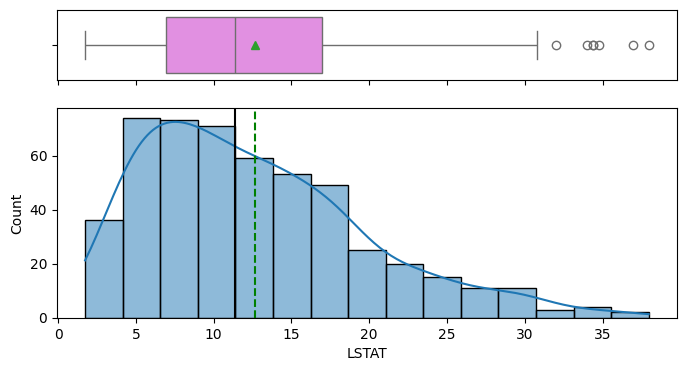

In [ ]:
histogram_boxplot(df, 'LSTAT', kde = True)

**Obervation:**

* LSTAT shows the distribution of low income and education in area, with the majority of areas being between 5-10%.

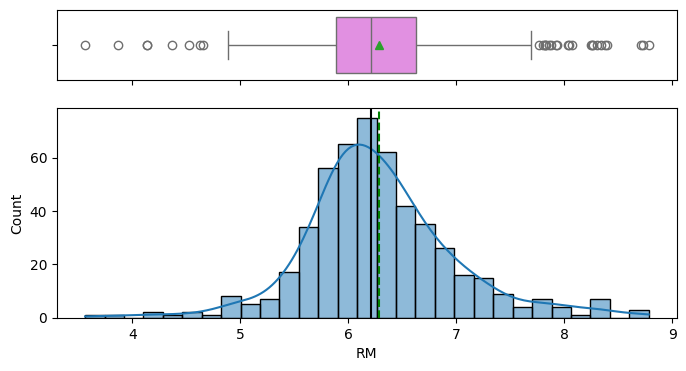

In [ ]:
histogram_boxplot(df, 'RM', kde = True)

**Observation:**

* RM is the most normal distribution of the numerical variables, with the average number of room being around 6, confirming it's the total number of rooms in the dwelling versus the number of bedroom logically.

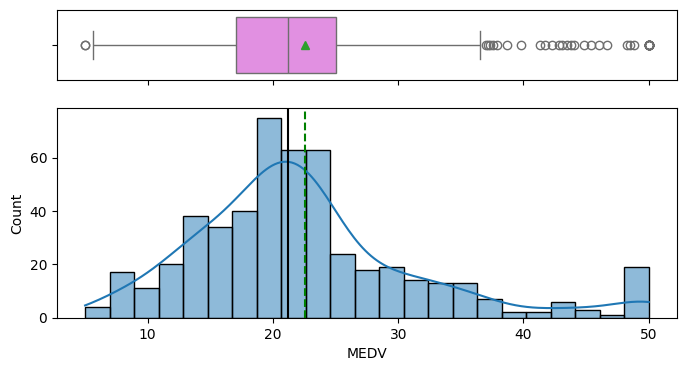

In [ ]:
histogram_boxplot(df, 'MEDV', kde = True)

**Observation:**

* The MEDV while not drastically right skewed, does show a level of right skew. **(QUESTION #1)**
* This doesn't appear to be a result of outliers as the number of dwellings around 50 per $1000 appear to be a significant number, which could also be attributed to, if you recall the TAX data, had a high upper tax rate range as well.
    * This also is affecting the mean at around 22 per $1000 compared to the median which is lower.

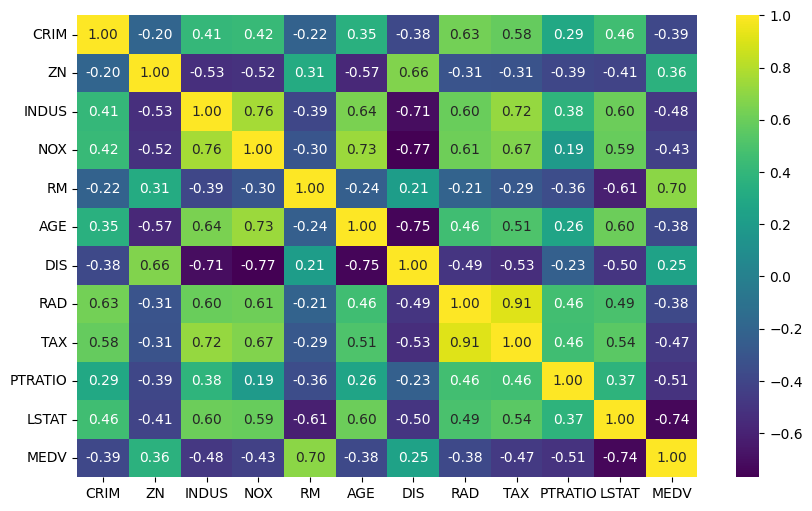

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'viridis')
plt.show()

**Observation:**

* MEDV, our target variable, is significantly correlated with RM (average number of rooms) and significantly negatively correlated with LSTAT. There is an obvious correlation to the pricing of a dwelling versus the number of rooms.  And as expected, the lower income areas ntield lower housing prices. **(QUESTION #2)**
    * While not above .7, we can see many not insignificant negative correlations with multiple categories: CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO, LSTAT. And a marginal correlation with ZN.
* Significant correlation between independent variables inclue:
    * NOX, INDUS, DIS, TAX, and AGE: which is explainable by increased industrial areas could increase Nitric Oxide, and perhaps correlate older dwellings due to aged infastructure, common in industrial areas.
      * INDUS/NOX and TAX are also fairly significantly correlated, which is harder to explain easily, there can be many confounding factors that can lead to this. Perhaps, infastructure and services, perhaps lower property values leading to higher taxes to cover the basic needs of the area.
      * INDUS/NOX is negatively correlated with DIS, which is logical, the further from the employment areas would tend to be more rural and country, decreasing the emissions.
    * TAX and RAD which might indicate that property taxes are higher in more desirable areas, which intern are areas that more easily accessible to the radial highways in this area.
* We can see many levels of correlation possitive and negative between independent and the dependent variables in this dataset.  Further investigation will show the importance of the these correlations and if perhaps we will need to address some Multicollinarity.
    


**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

## **Bivariate Analysis**  **(QUESTION #4)**

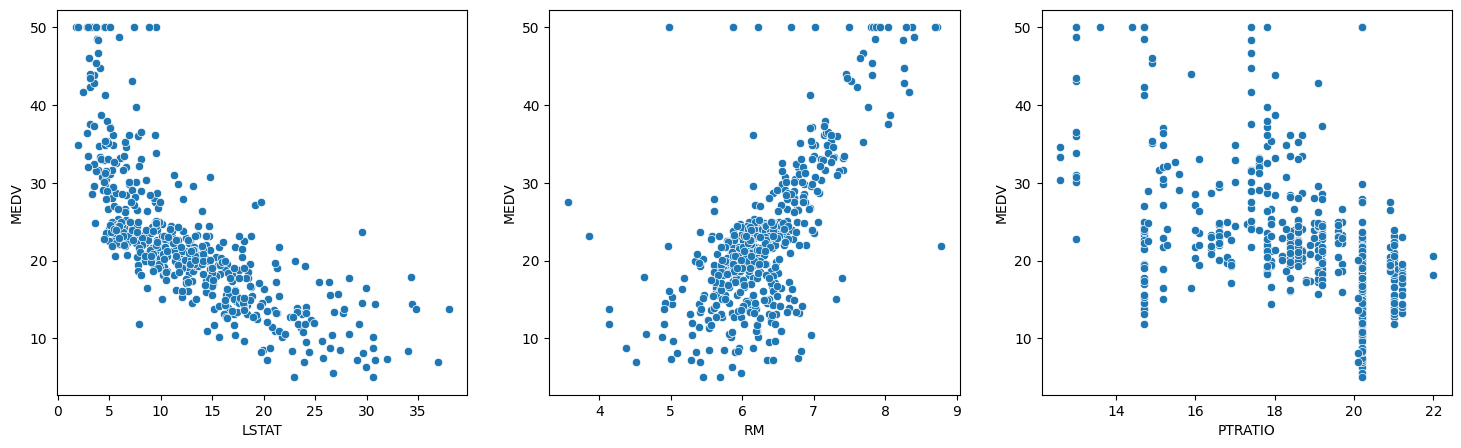

In [ ]:
# Checking the independent and dependent variable correlations
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df, ax = axes[0]);
sns.scatterplot(x = 'RM', y = 'MEDV', data = df, ax = axes[1]);
sns.scatterplot(x = 'PTRATIO', y = 'MEDV', data = df, ax = axes[2]);

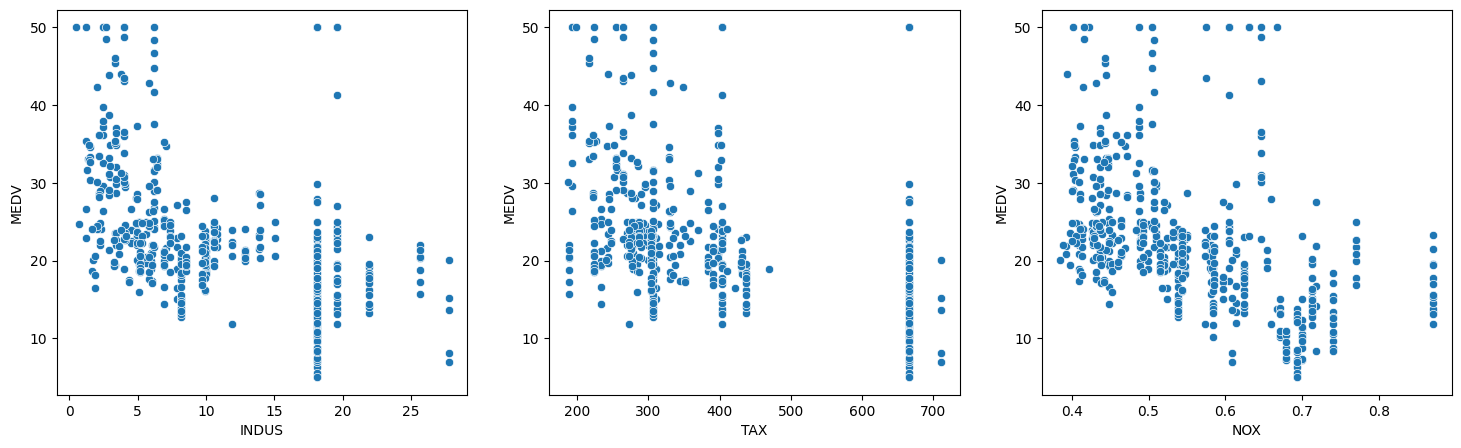

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
sns.scatterplot(x = 'INDUS', y = 'MEDV', data = df, ax = axes[0]);
sns.scatterplot(x = 'TAX', y = 'MEDV', data = df, ax = axes[1]);
sns.scatterplot(x = 'NOX', y = 'MEDV', data = df, ax = axes[2]);

<Axes: xlabel='AGE', ylabel='MEDV'>

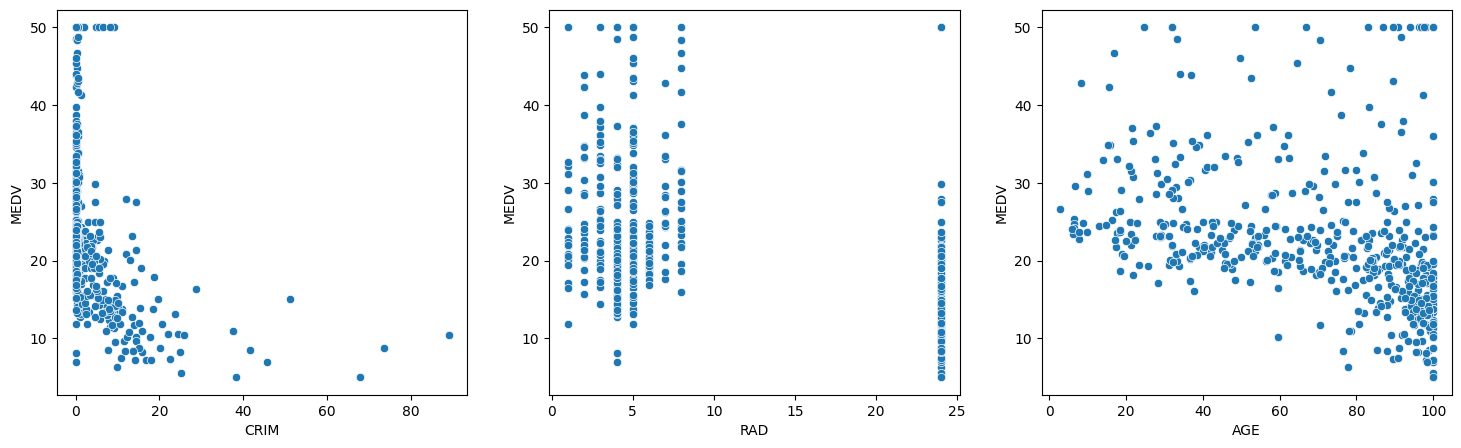

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
sns.scatterplot(x = 'CRIM', y = 'MEDV', data = df, ax = axes[0]);
sns.scatterplot(x = 'RAD', y = 'MEDV', data = df, ax = axes[1]);
sns.scatterplot(x = 'AGE', y = 'MEDV', data = df, ax = axes[2])

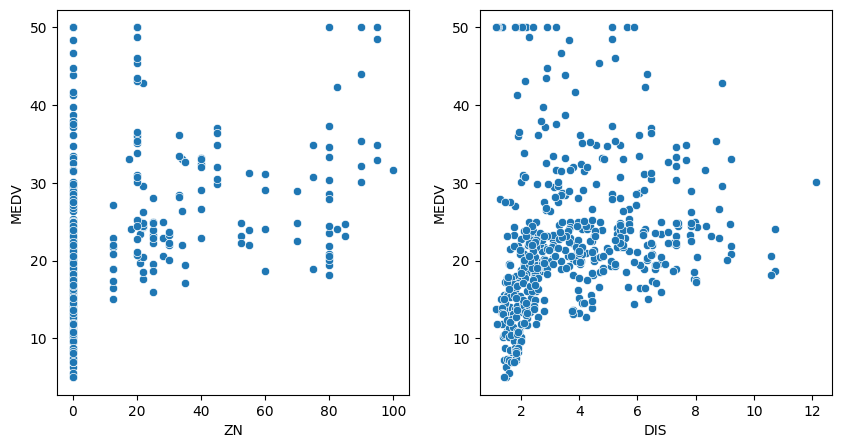

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(x = 'ZN', y = 'MEDV', data = df, ax = axes[0]);
sns.scatterplot(x = 'DIS', y = 'MEDV', data = df, ax = axes[1]);

**Observation:**

* Ordered from highest (positve or negative) correlation at 0.74 to 0.25 the dependent variable is likely a combination of confounding features.
* Many general statements can be made again:
  * LSTAT negatively impacts MEDV
  * Increasred RM postively impacts MEDV
  * Lower PTRATIO the increases MEDV

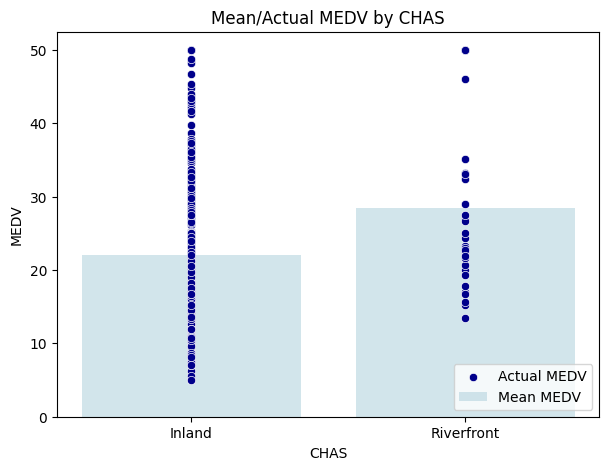

In [ ]:
# Checking the dependent variable with the categorical variable
mean_price = df.groupby('CHAS')['MEDV'].mean()
mean_price_df = mean_price.reset_index()
mean_price_df['CHAS'] = mean_price_df['CHAS'].map({0: 'Inland', 1: 'Riverfront'})
plt.figure(figsize=(7, 5))

sns.barplot(x='CHAS', y='MEDV', data=mean_price_df, color='lightblue', alpha=0.6, label='Mean MEDV')
sns.scatterplot(x='CHAS', y='MEDV', data=df, color='darkblue', label='Actual MEDV')

plt.title('Mean/Actual MEDV by CHAS')
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.legend(loc = 'lower right')
plt.show()

**Observation:**

* While you don't see a notable correlation on the heatmap, you can see that the data is distributed as expected for housing prices vs inland and riverfront.

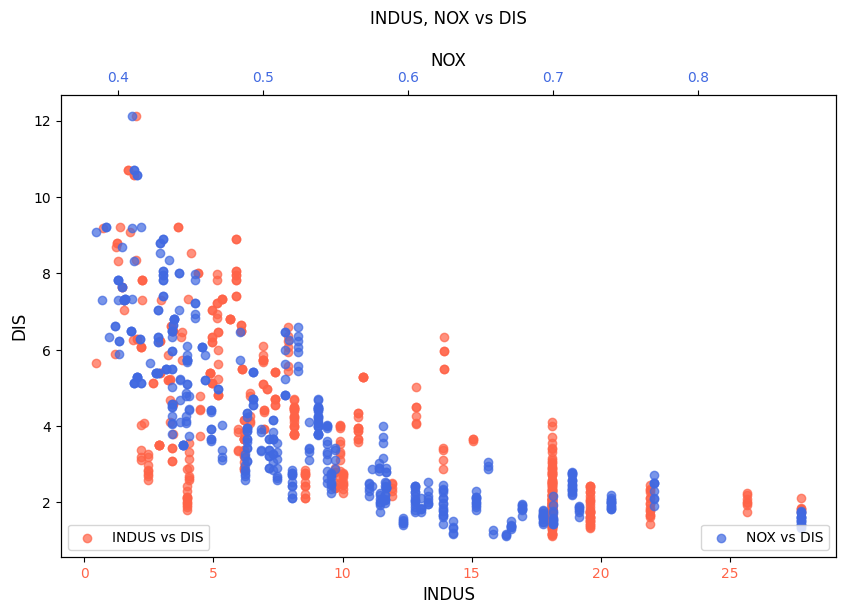

In [ ]:
# Checking multiple independent variable correlations
fig, ax1 = plt.subplots(figsize=(10, 6))

scatter1 = ax1.scatter(df['INDUS'], df['DIS'], color='tomato', alpha=0.7, label='INDUS vs DIS')
ax1.set_xlabel('INDUS', fontsize=12)
ax1.set_ylabel('DIS', fontsize=12)
ax1.tick_params(axis='x', labelcolor='tomato')

ax2 = ax1.twiny()
scatter2 = ax2.scatter(df['NOX'], df['DIS'], color='royalblue', alpha=0.7, label='NOX vs DIS')
ax2.set_xlabel('NOX', fontsize=12)
ax2.tick_params(axis='x', labelcolor='royalblue')

ax1.legend(handles=[scatter1], loc='lower left')
ax2.legend(handles=[scatter2], loc='lower right')
plt.title('INDUS, NOX vs DIS', pad=20)
plt.show()

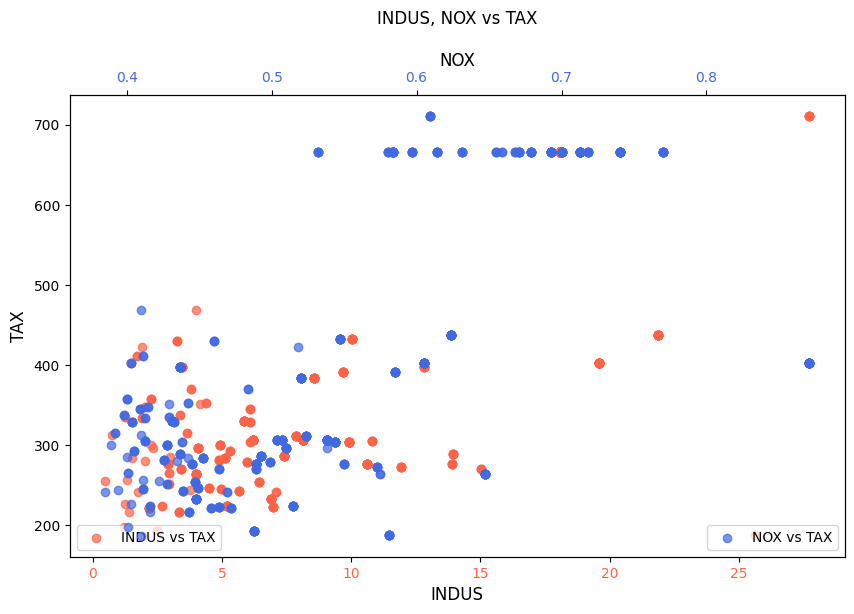

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

scatter1 = ax1.scatter(df['INDUS'], df['TAX'], color='tomato', alpha=0.7, label='INDUS vs TAX')
ax1.set_xlabel('INDUS', fontsize=12)
ax1.set_ylabel('TAX', fontsize=12)
ax1.tick_params(axis='x', labelcolor='tomato')

ax2 = ax1.twiny()
scatter2 = ax2.scatter(df['NOX'], df['TAX'], color='royalblue', alpha=0.7, label='NOX vs TAX')
ax2.set_xlabel('NOX', fontsize=12)
ax2.tick_params(axis='x', labelcolor='royalblue')

ax1.legend(handles=[scatter1], loc='lower left')
ax2.legend(handles=[scatter2], loc='lower right')
plt.title('INDUS, NOX vs TAX', pad=20)
plt.show()

**Observation:**

* As expected there is a strong correlation between industrial related columns, like NOX and the distrance to the industrial areas.
* A little less expected is the postive correlation between residential property tax and industrial related columns, but as described before, this can be result of the limited residential population therefore resulting in higher tax rates to account for basic city requirements.

<Axes: xlabel='RAD', ylabel='TAX'>

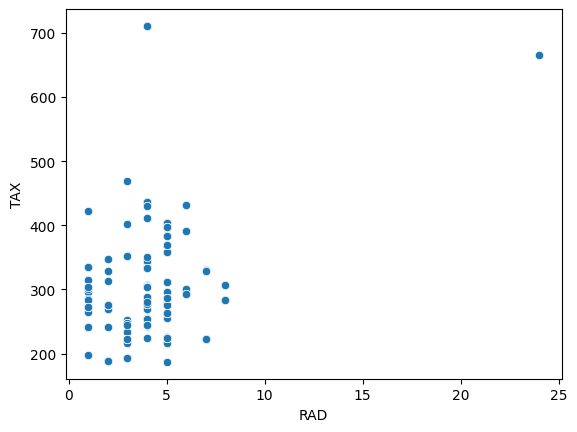

In [ ]:
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

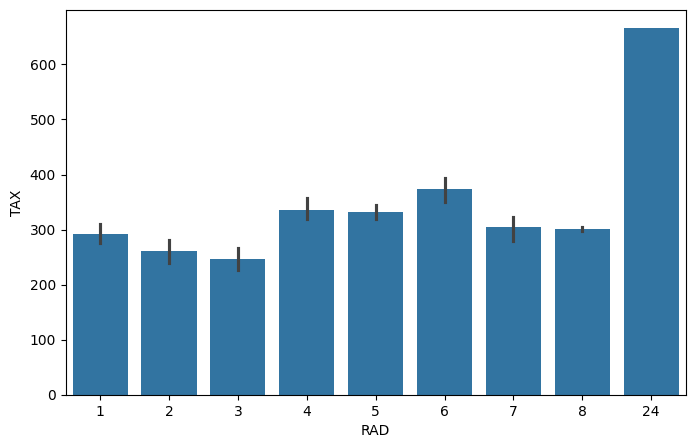

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data = df, x = 'RAD', y ='TAX')
plt.show()

In [ ]:
filtered_df = df[df['RAD'] == 24]
filtered_df.shape

(132, 13)

**Observation:**

* Tax values compared to the accessibility to radial highways has a relatively uniform distribution, except in the most accessiable zone of 24, which consists of 132 suburbs or towns.
* And while the does severely affect the correlation, it does represent a significant amount of data, so before addressing it's relevance, lets see what the model will show.

# **Data Preprocessing**

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### **Missing Value Treatment**

In [ ]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 51.5+ KB


**Observations:**

* There are no missing values, therefore no treatment for this is necessary.

### **Outlier Detection and Treatment**

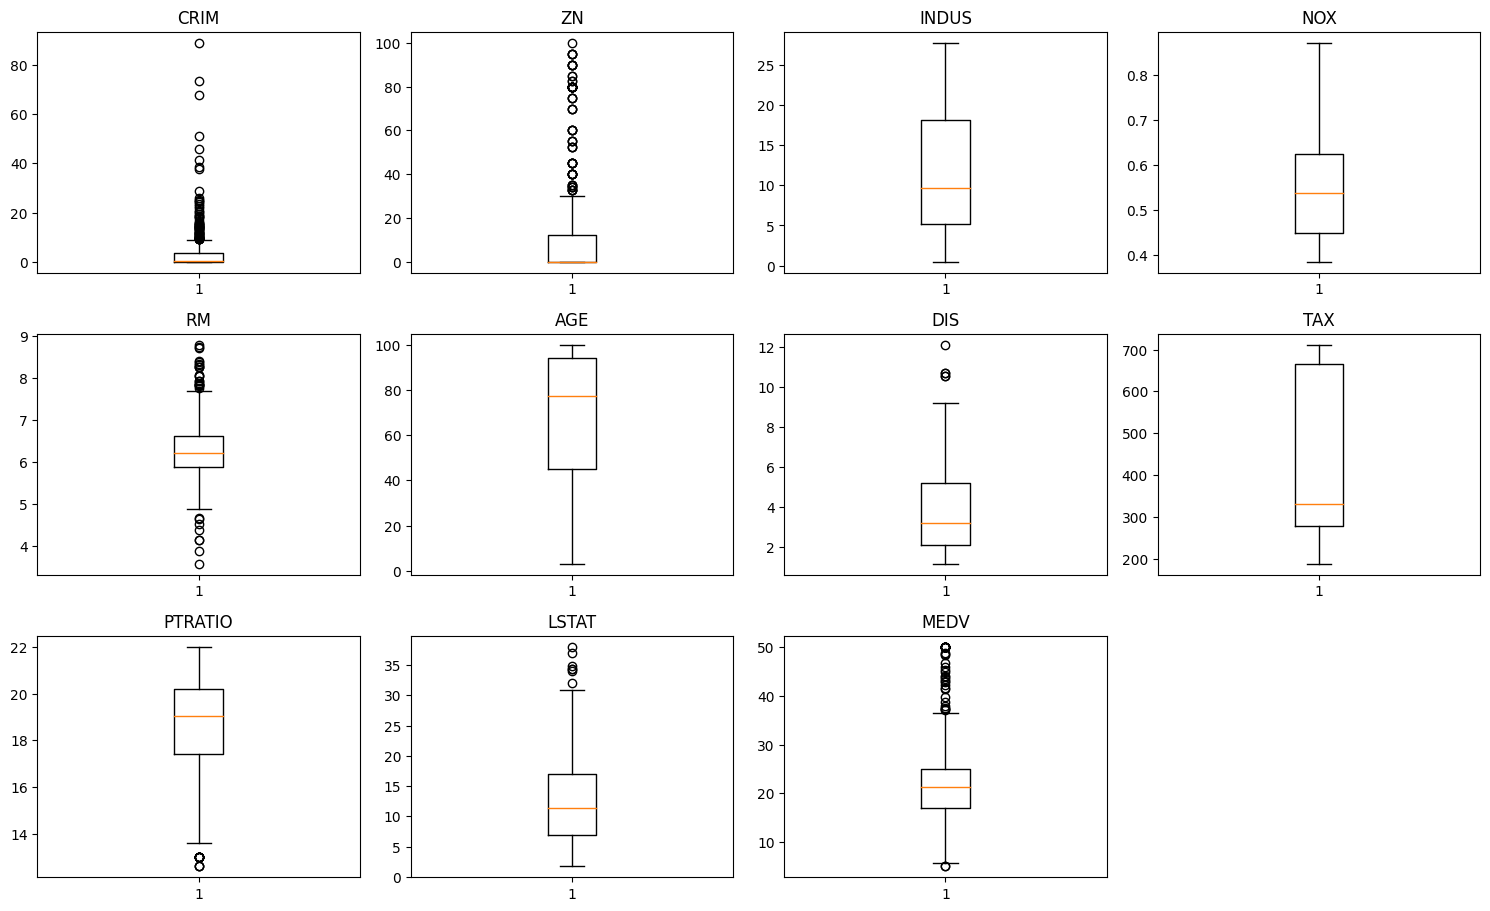

In [ ]:
# Outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('RAD')

plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
    # Checking the percentage of outliers for each independent variable
    for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


**Observation:**

* The data shows what could easily be described as outliers, although, with the proportion of the data that's represented in these upper areas is significant, and don't appear to be error in data recording.

### **Log transformation**

In [ ]:
# Performing a log transformation to address the right skew of the dependent variable
df['log_MEDV'] = np.log(df['MEDV'])
df = df.drop('MEDV', axis=1)

<Axes: xlabel='log_MEDV', ylabel='Count'>

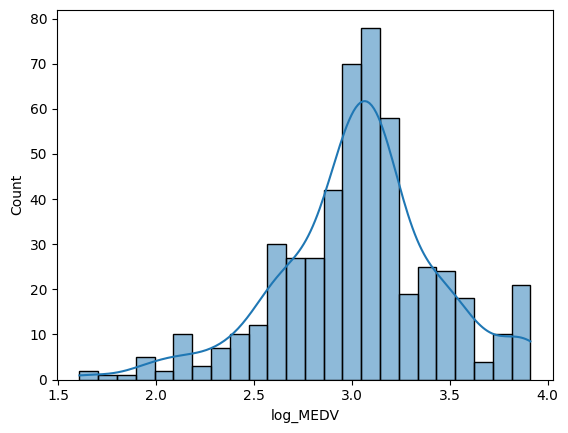

In [ ]:
sns.histplot(df['log_MEDV'], kde = True)

**Observation:**

* The log addressed the right skew of the dependent variable.


### **Preparing the data for Modeling and other Preprocessing Steps**

In [ ]:
# Seperating independent and dependent variables
X = df.drop(['log_MEDV'], axis = 1)
y = df['log_MEDV']

In [ ]:
#  Adding an intercept term to increase stability in the model
X = sm.add_constant(X)

In [ ]:
# Using One Hot Encoding on the categorical variable
X_ohe = pd.get_dummies(X,
               columns = X.select_dtypes(include = ['object']).columns.to_list(),
               drop_first = True,
)

In [ ]:
# Spliting the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.3, random_state = 0)

### **QUESTION 2**

In [ ]:
# Preprocessing Multicollinearity check
VIF_df = pd.DataFrame()
VIF_df['Features'] = X_train.columns
VIF_df['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
VIF_df

,Features,VIF
0,const,545.124656
1,CRIM,1.719008
2,ZN,2.338391
3,INDUS,3.885986
4,NOX,4.542569
5,RM,2.006116
6,AGE,3.303822
7,DIS,3.977920
8,RAD,7.444340
9,TAX,9.058201


**Observation:**

* TAX has a high multicollinearity, before modeling, we will drop this value, and we will confirm that this lowered also the RAD to below 5, considering their high correlation in the heatmap.

In [ ]:
# Dropping high multicollinearity
X_train.drop(columns = ['TAX'], axis = 0, inplace = True)
X_test.drop(columns = ['TAX'], axis = 0, inplace = True)

In [ ]:
# Rechecking VIF scores
VIF_df = pd.DataFrame()
VIF_df['Features'] = X_train.columns
VIF_df['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
VIF_df

,Features,VIF
0,const,538.618796
1,CRIM,1.718827
2,ZN,2.232513
3,INDUS,3.098870
4,NOX,4.524513
5,RM,1.992780
6,AGE,3.296207
7,DIS,3.977458
8,RAD,2.745579
9,PTRATIO,1.860623


**Observation:**

* Dropping TAX put all VIF values are below 5, let's proceed with building the model and determine if we need to further remove any features.

## Model Building - Linear Regression

### **Model 1**

In [ ]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_MEDV   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     125.7
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          5.62e-113
Time:                        15:54:34   Log-Likelihood:                 104.94
No. Observations:                 354   AIC:                            -185.9
Df Residuals:                     342   BIC:                            -139.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1115      0.226     18.212      0.000       3.667       4.556
CRIM          -0.0112      0.002     -7.352      0.000      -0.014      -0.008
ZN             0.0006      0.001      0.926      0.355      -0.001       0.002
INDUS         -0.0025      0.002     -1.037      0.300      -0.007       0.002
NOX           -0.7299      0.179     -4.072      0.000      -1.082      -0.377
RM             0.1064      0.020      5.432      0.000       0.068       0.145
AGE           -0.0004      0.001     -0.711      0.477      -0.002       0.001
DIS           -0.0507      0.009     -5.399      0.000      -0.069      -0.032
RAD            0.0028      0.002      1.492      0.137      -0.001       0.006
PTRATIO       -0.0404      0.006     -6.771      0.000      -0.052      -0.029
LSTAT         -0.0271      0.002    -11.414      0.000      -0.032      -0.022
CHAS_1         0.1264      0.040      3.140      0.002       0.047       0.206
==============================================================================
Omnibus:                       34.809   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.911
Skew:                           0.332   Prob(JB):                     1.24e-27
Kurtosis:                       5.821   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation:**

* First model is fairly strong with a rsquared of 0.80 and the Adj rsquared is very similar to the rsquared.
* The Prob (F-statistic) also shows that the model is significant with a very low value there.
* The standard error of the coefficents all seem very reasonable.
* We do see that ZN, INDUS, and AGE have a value higher than 0.05, we could remove them and determine if it improves the model.  Let's create a second model exluding these features.
  * It was determined that despite RAD having a value you higher than 0.05, if removed the rsquared of the model suffered, therefore indicating that there is value in RAD for the overall performance of the model.

In [ ]:
# Dropping insignificant variables
X_train.drop(columns = ['INDUS', 'AGE', 'ZN'], axis = 1, inplace = True)
X_test.drop(columns = ['INDUS', 'AGE', 'ZN'], axis = 1, inplace = True)

### **Model 2**

In [ ]:
model2 = sm.OLS(y_train, X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_MEDV   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     172.8
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          9.48e-116
Time:                        15:54:42   Log-Likelihood:                 103.63
No. Observations:                 354   AIC:                            -189.3
Df Residuals:                     345   BIC:                            -154.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1487      0.224     18.501      0.000       3.708       4.590
CRIM          -0.0110      0.002     -7.239      0.000      -0.014      -0.008
NOX           -0.8408      0.160     -5.253      0.000      -1.156      -0.526
RM             0.1090      0.019      5.786      0.000       0.072       0.146
DIS           -0.0422      0.008     -5.599      0.000      -0.057      -0.027
RAD            0.0029      0.002      1.603      0.110      -0.001       0.007
PTRATIO       -0.0442      0.005     -8.143      0.000      -0.055      -0.034
LSTAT         -0.0279      0.002    -12.537      0.000      -0.032      -0.023
CHAS_1         0.1207      0.040      3.012      0.003       0.042       0.199
==============================================================================
Omnibus:                       35.328   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.956
Skew:                           0.348   Prob(JB):                     1.21e-27
Kurtosis:                       5.814   Cond. No.                         683.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**

* After dropping ZN, INDUS, and AGE, we see they didn't contribute signifcantly to the model, and all values are still very strong.
* We still have a 0.80 rsquared and prob(F-Statistic) value that indicate a strong model. Let's check it's performance further.

## **Model Performance Check**

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF **(found in preprocessing)**
3. How does the model is performing after cross validation?

### **QUESTION 1**

In [ ]:
# Checking the models performance with the dependent variable log
def model_evaluation(model, X, y):
  y_hat = model2.predict(X)

  rmse = np.sqrt(mean_squared_error(y, y_hat))
  mae = mean_absolute_error(y, y_hat)
  mape = mean_absolute_percentage_error(y, y_hat)
  r2 = r2_score(y, y_hat)

  return pd.DataFrame({'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape], 'R2': [r2]})

In [ ]:
model_evaluation(model2, X_train, y_train)

,RMSE,MAE,MAPE,R2
0,0.18056,0.131178,0.045637,0.800293


In [ ]:
model_evaluation(model2, X_test, y_test)

,RMSE,MAE,MAPE,R2
0,0.224316,0.160703,0.056185,0.710818


**Observation:**

* Overall the model is performing reasonably well.  There might be some small overfitting, but I think given the small size of the dataset and the range of the variables, this is able to capture an impressive amount of the variation in the data.
  * RMSE values are close, rsquared are in a reasonable range at 0.80 and 0.71, overall it's performing not quite as good on the test as it is on the train, but given the nature of the data, it's done reasonably well.
  * **After extensive trial and error to raise these values, most of which including removing some outliers, the values actually worsened. I wish these numbers were a little higher, but after consideration, I believe this is a good model.
  * Let's see what happens with the cross-validation values, perhaps it will be a better estimate of the performance due to the size of the data set.
  * In order to have better understanding of some of the values in the model evaluation, let's back transform the log of the dependent variable.

In [ ]:
# Back transforming the log dependent variable using Duan's smearing estimator for the bias correction factor
def model_evaluation(model, X, y_test):
    y_log_hat = model2.predict(X)

    log_scale_mse = mean_squared_error(y_test, y_log_hat)
    log_scale_rmse = np.sqrt(log_scale_mse)

    residuals = y_test - y_log_hat
    smearing_factor = np.mean(np.exp(residuals))

    y_hat = np.exp(y_log_hat) * smearing_factor

    y = np.exp(y_test)

    rmse = np.sqrt(mean_squared_error(y, y_hat))
    mae = mean_absolute_error(y, y_hat)
    mape = np.mean(np.abs((y - y_hat) / y)) * 100
    r2 = r2_score(y, y_hat)

    return pd.DataFrame({'Log Scale RMSE': [log_scale_rmse],
                         'Bias Corrected RMSE': [rmse],
                         'MAE': [mae],
                         'MAPE': [mape],
                        })
evaluation_results_test = model_evaluation(model2, X_test, y_test)
print(evaluation_results_test)

   Log Scale RMSE  Bias Corrected RMSE       MAE       MAPE
0        0.224316             5.121749  3.453104  16.826117


**Observation:**

* The MAE indicates that it can predict the Median Value of the owner-occupied home within 3453 dollars on the test data. The RMSE is within 5121 dollars, and is higher because MAE penalizes the outliers more.
* And with MAPE a approx 16% error on the test data.

### **QUESTION 3**

In [ ]:
# Check if there is an improvment with cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.762 (+/- 0.187)
Mean Squared Error: 0.036 (+/- 0.028)


**Observation:**

* The rsquared value improved from 0.71 to 0.76 and is within a reasonable distance from the 0.80 rsquared of the training data.

## **Checking Linear Regression Assumptions**

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### **1. Check for Mean Residuals**

In [ ]:
# Checking the mean of the residuals
np.mean(model2.resid)

-1.5612119255887088e-15

**Observation:**

* As the mean needs to be nearly zero, this check is satisfied at nearly zero.

### **2. Check for Homoscedasticity**

In [ ]:
# Checking with the Goldfeldquandt Test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0313571095715435), ('p-value', 0.4208205657346468)]

**Observation:**

* With a p-value >0.05 at 0.42 we therefore have satisfied this assumption that the residuals are infact heteroscedastic and non symmetrical.

### **3. Linearity of Variables**

Text(0.5, 1.0, 'Residuals vs Fitted Values')

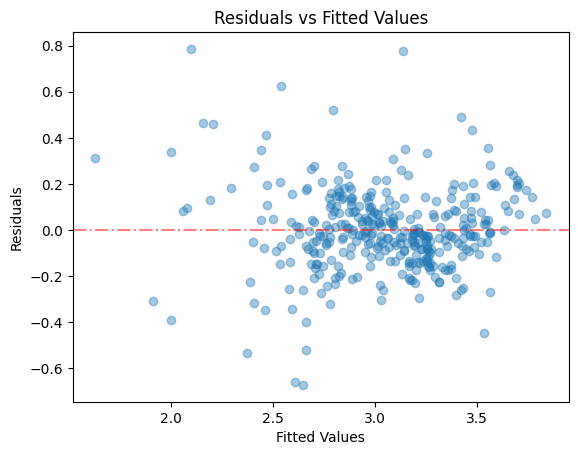

In [ ]:
# Checking the Linearity with Residuals vs Fitted Values
plt.scatter(model2.fittedvalues, model2.resid, alpha=0.4)
plt.axhline(0, color = 'r', alpha = 0.5, linestyle = '-.')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

**Observation:**

* There are no distinct patterns in the plot, and are generally scattered around the horizontal axis. This assumption is satisfied.

### **4. Normality of Error Terms**

<Axes: ylabel='Count'>

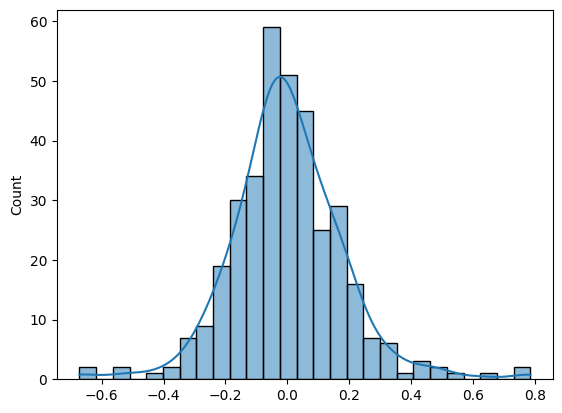

In [ ]:
# Checking if the residuals are normally distributed
sns.histplot(model2.resid, kde = True)

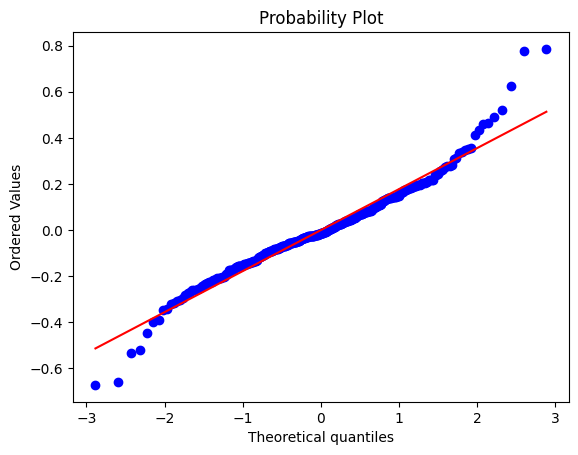

In [ ]:
# Plotting Q-Q of residuals
stats.probplot(model2.resid, dist = 'norm', plot = pylab)
plt.show()

**Observation:**

* Both plots indicate that the residuals follow a normal distribution, and therefore the assumption is satisfied.

## Final Model

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_MEDV   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     172.8
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          9.48e-116
Time:                        15:55:20   Log-Likelihood:                 103.63
No. Observations:                 354   AIC:                            -189.3
Df Residuals:                     345   BIC:                            -154.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1487      0.224     18.501      0.000       3.708       4.590
CRIM          -0.0110      0.002     -7.239      0.000      -0.014      -0.008
NOX           -0.8408      0.160     -5.253      0.000      -1.156      -0.526
RM             0.1090      0.019      5.786      0.000       0.072       0.146
DIS           -0.0422      0.008     -5.599      0.000      -0.057      -0.027
RAD            0.0029      0.002      1.603      0.110      -0.001       0.007
PTRATIO       -0.0442      0.005     -8.143      0.000      -0.055      -0.034
LSTAT         -0.0279      0.002    -12.537      0.000      -0.032      -0.023
CHAS_1         0.1207      0.040      3.012      0.003       0.042       0.199
==============================================================================
Omnibus:                       35.328   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.956
Skew:                           0.348   Prob(JB):                     1.21e-27
Kurtosis:                       5.814   Cond. No.                         683.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Median value of owner-occupied homes in 1000 dollar prediction equation

coef = model2.params

Equation = "Median value predictor="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Median value predictor=	( 4.148652480665689 ) *  const + ( -0.011006979614811 ) *  CRIM + ( -0.8408145369625948 ) *  NOX + ( 0.10897694835357455 ) *  RM + ( -0.0421664735230199 ) *  DIS + ( 0.0029270499725600717 ) *  RAD + ( -0.0441891912271258 ) *  PTRATIO + ( -0.027851534502990757 ) *  LSTAT + ( 0.12065315942206987 ) *  CHAS_1 + 

**Observation:**

The final equation is as follows:

**$\log($Median value$)$ $=4.1487 − 0.0110 *$ CRIM$ − 0.8408 *$ NOX$ + 0.1090 *$ RM$ − 0.0422 *$ DIS$ + 0.0029 *$ RAD$ − 0.0442 *$ PTRATIO$ − 0.0279 *$ LSTAT$ + 0.1207 *$ CHAS_1**

For a more interpretable understanding of the equation because of the log transformation:
 * **CRIM**: A one-unit increase in per capita crime rate by town is associated with a ~**−1.10%** decrease in the median value of homes.
 * **NOX**: A one-unit increase in nitric oxides concentration (parts per 10 million) is associated with a ~**−56.94%** decrease in the median value.
 * **RM**: A one-unit increase in the average number of rooms per dwelling is associated with a ~**11.52%** increase in the median value.
 * **DIS**: A one-unit increase in the weighted dist. to five employment centres is associated with a ~**−4.14%** decrease in the median value.
 * **RAD**: A one-unit increase in the index of accessibility to radial highways is associated with a ~**0.29%** increase in the median value.
 * **PTRATIO**: A one-unit increase in the pupil-teacher ratio by town is associated with a ~**−4.31%** decrease in the median value of homes.
 * **LSTAT**: A one-unit increase in the percent of lower status of the population is associated with a ~**−2.74%** decrease in the median value.
 * **CHAS_1**: The presence of a tract bound by the Charles River is associated with a ~**12.83%** increase in the median value of homes.

This shows  NOX, RM, and CHAS are the three top contributing factors in predicting the medican value of owner-occupied homes in 1000 dollars.

## Actionable Insights and Recommendations

Overall, the interaction between the attributes and the median value of owner-occupied homes has provided a lot of insight into key features and their affects.  From this relatively small and simple dataset we can easily find value for home buyers, property investors, housebuilders, and even policy makers. We are able to quantify the effects of a mixture of evironmental, socioeconomic, and geographical features with the use of a simple model that can easily be used for informed decison making.

  Key points that can be made that are actionable for various entities:
  * Prioritizing investing in areas with lower pupil to teacher ratios.
  * The valuing of proximity to employment centers.
  * Addressing the negative impact of pollution on home values.
  * Understanding asthetics plays an important role in value.
  * Associating larger dwellings with increased marketability.

Considering this dataset orginates from 1970 and we have the gift of hindsight, the most obvious reccommendation for what the information gathered indicates is in fact what has happened all over the Eastern coasts and Riverfronts of American during this time, and that is the repurposing highly industrial areas that are found on the waterways to affluent modern downtown communities.  The Boston Housing dataset is a perfect depiction of why and how this urbanization was effective.  Let's look at what the dataset indicates:
  * The presence of the Charles River tracting the suburb or town increases the median values by 12.83%.
  * The increased number of rooms of the dwellings increased the median values by 11.52%.
  * The presence of industry, as indicated by Nitric Oxide levels, decreased the median values by 56.94%.

As the change in our countries lanscape from highly industralized areas to a more environmental conscious method of production, compounded by techniological advancements, and outsourcing, our country's industrial areas were and are the perfect recipe for transitioning to downtown affluent, modern, loft style, highly accessibile areas.  In this dataset, there are 8 suburbs or towns that are the exact discription of this scenario, riverfront, industrial, highly accessible areas. These are the areas that I would reccommend looking towards investing in.  Public and private investment is mandatory for tranisitioning these areas in the the downtown beautification projects that have happened all over our country in the last half century. For example:
  * Private investment means property investors reclaiming these insdustrial warehouses to large (6+ rooms) to be owner-occupied apartments.
  * Public investment means policy makers allowing for the infastructure like creating schools which will decrease the student to teacher ratios that attract the more affluent portion of society.
  
The time frame of this dataset leaves little to the imagination of the success of this concept, but it does feel rewarding to know that while the ability to write models to determine these factors at the time were unavailable, we are now able to look back at these datasets and be proud of the pioneers that were able to see this future that has given us the beautiful downtown areas that we all travel to and enjoy now.

There are also multiple reccommendations to be made that could improve the modeling for this dataset.  Limiting modeling to Linear Regression has value in the interpretablility of the information, but it can also lead to a lower model performance, especially with a data set such as this.  I would reccommend comparing Linear, Ridge, Lasso, and Elastic Net, but also exploring other options such as Decsision Trees and Random Forests.  And of course, if possible, simply increasing the size of the dataset would greatly impact the performance of any model.




___